<a href="https://colab.research.google.com/github/GaneshKannanOfficial/BitcoinPrice_Prediction/blob/main/BitCoin_XGBReg_GridSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf

In [3]:
df = yf.download('BTC-USD')

[*********************100%%**********************]  1 of 1 completed


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

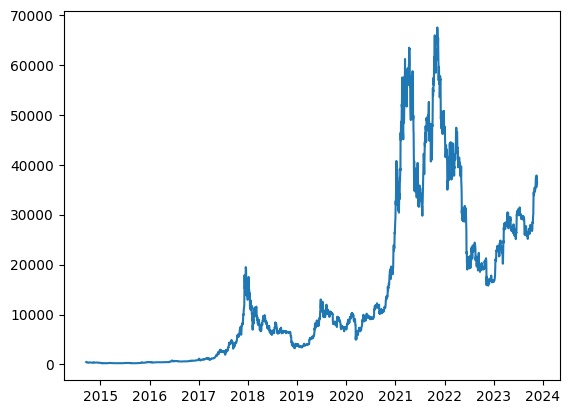

In [5]:
plt.plot(df.index,df['Adj Close'])

In [6]:
x = df[['Open','High','Low','Volume']]
y = df['Adj Close']

# Assuming x_train, x_test, y_train, y_test are already defined as per your previous code
row = int(len(x)*0.9)
x_train = x[:row]
x_test = x[row:]
y_train = y[:row]
y_test = y[row:]


In [21]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Parameters for grid search
xgb_param_grid = {
    'n_estimators': [200,100,1000],
    'max_depth': [5, 7, 9],
    'learning_rate': [0.1, 0.2],
}

# Create the XGBoost Regressor model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=0)

# Create Grid Search object
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=3, verbose=2, n_jobs=-1)

# Fit the model
xgb_grid_search.fit(x_train, y_train)

# Best parameters found
best_params_xgb = xgb_grid_search.best_params_
print("Best parameters for XGBoost Regressor: ", best_params_xgb)

# Using the best parameters to create a new XGBoost model
best_xgb = xgb.XGBRegressor(**best_params_xgb, objective='reg:squarederror')
best_xgb.fit(x_train, y_train)

# Predicting the test set results
y_pred_xgb = best_xgb.predict(x_test)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters for XGBoost Regressor:  {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}


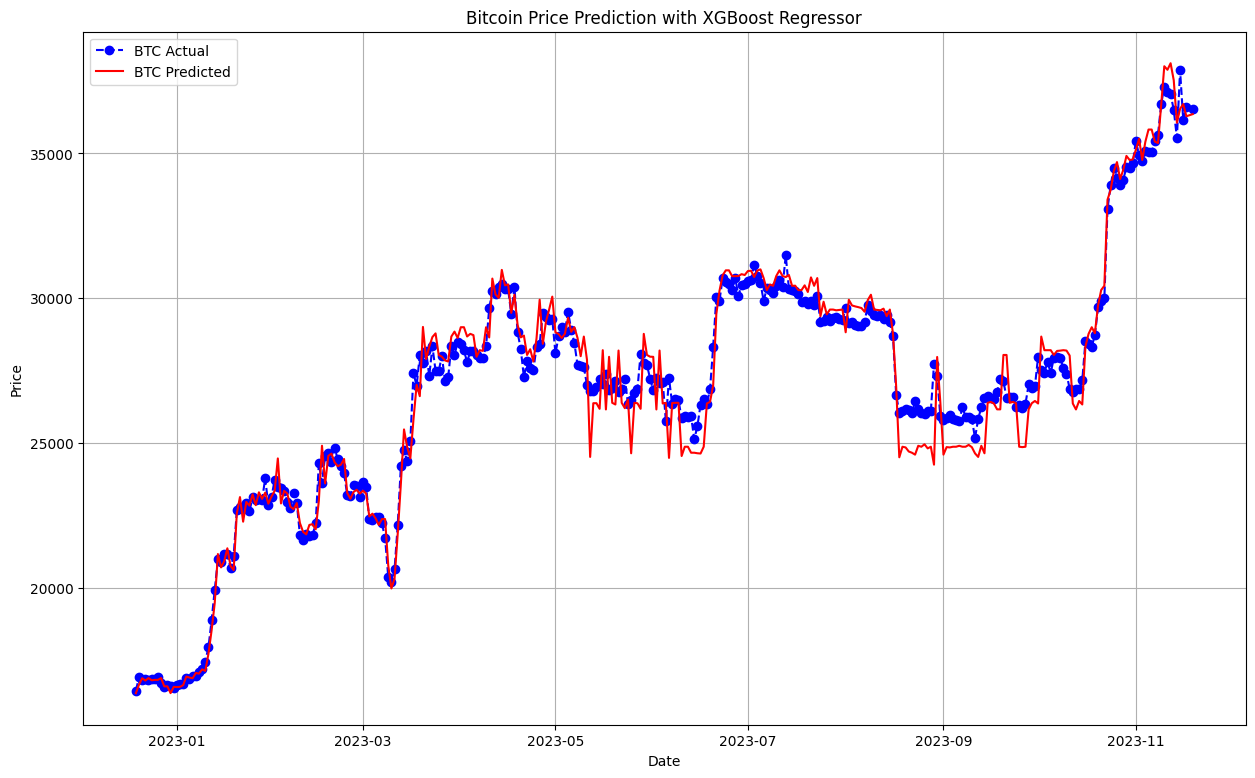

In [18]:
# Plotting the results
plt.figure(figsize=(15, 9))
plt.grid(True)
plt.plot(df.index[row:], y_test, color='b', marker='o', linestyle='dashed', label='BTC Actual')
plt.plot(df.index[row:], y_pred_xgb, color='r', label='BTC Predicted')
plt.title('Bitcoin Price Prediction with XGBoost Regressor')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [19]:
# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_r2 = r2_score(y_test, y_pred_xgb)

# Displaying metrics
metrics_df_xgb = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'R-squared (R2)'],
    'Value': [xgb_rmse, xgb_mae, xgb_r2]
})
print(metrics_df_xgb)

           Metric       Value
0            RMSE  738.723502
1             MAE  550.260923
2  R-squared (R2)    0.971602
